In [1]:
#data generation
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
#defining SGD function
def sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1):
    m = len(X)
    theta = np.random.randn(2, 1)

    X_bias = np.c_[np.ones((m, 1)), X]

    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            gradients = 2 / batch_size * \
                X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients

        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return theta, cost_history

In [3]:
#model training using SGD
theta_final, cost_history = sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1)

Epoch 0, Cost: 1.581821686856939
Epoch 100, Cost: 1.5664692700155733
Epoch 200, Cost: 1.4445422391173144
Epoch 300, Cost: 1.7037674963102662
Epoch 400, Cost: 0.9101999515899212
Epoch 500, Cost: 0.8184497904316664
Epoch 600, Cost: 0.8352333304446237
Epoch 700, Cost: 0.8542729530055074
Epoch 800, Cost: 1.0508310318687628
Epoch 900, Cost: 0.8261971232182218


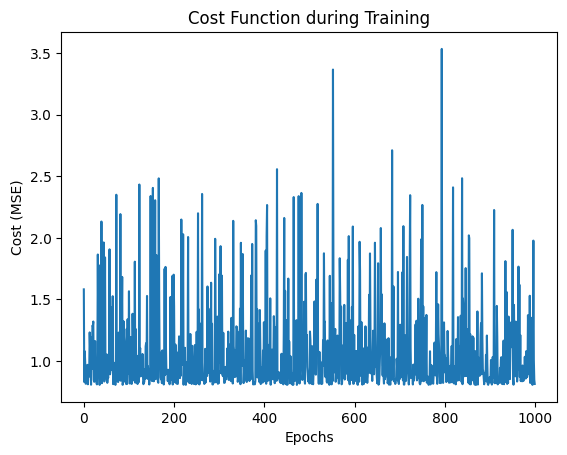

In [4]:
#visualising cost function
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function during Training')
plt.show()

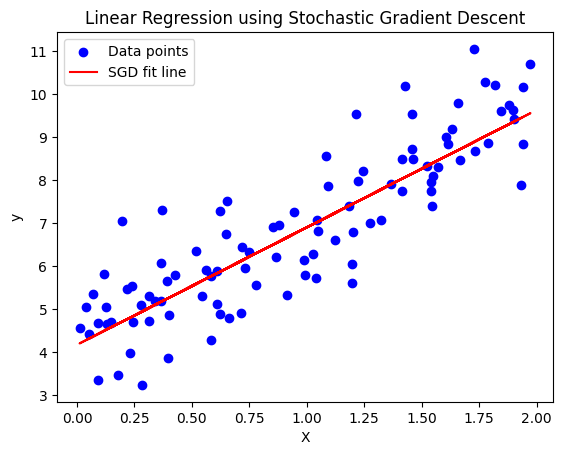

In [5]:
#plotting data and regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, np.c_[np.ones((X.shape[0], 1)), X].dot(
    theta_final), color='red', label='SGD fit line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Stochastic Gradient Descent')
plt.legend()
plt.show()

In [6]:
#printing final model parameters

print(f"Final parameters: {theta_final}")

Final parameters: [[4.17209292]
 [2.72564644]]


Implementing Mini Batch Gradient Descent in Tensorflow

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5247 - loss: 0.6935
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5272 - loss: 0.6919
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5598 - loss: 0.6839
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5637 - loss: 0.6866
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5478 - loss: 0.6853
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 0.6845
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5434 - loss: 0.6897
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5454 - loss: 0.6811
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5794 - loss: 0.6771
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5672 - loss: 0.6808


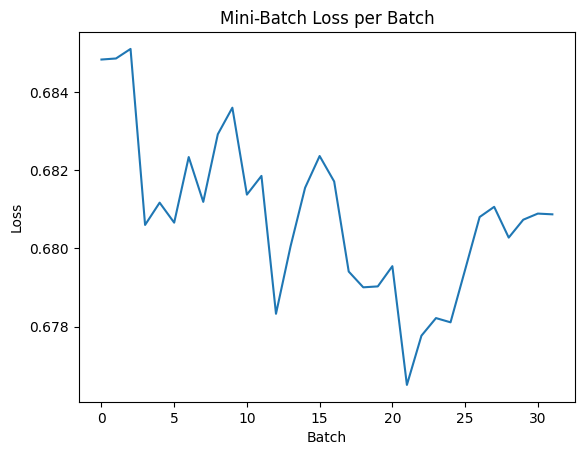

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

X_train = np.random.rand(1000, 20)
y_train = np.random.randint(0, 2, size=(1000, 1))

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

class BatchLossHistory(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        self.losses.append(logs['loss'])

    def on_epoch_begin(self, epoch, logs=None):
        self.losses = []

batch_loss_history = BatchLossHistory()

history = model.fit(X_train, y_train, epochs=10, batch_size=32, callbacks=[batch_loss_history], verbose=1)

plt.plot(batch_loss_history.losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Mini-Batch Loss per Batch')
plt.show()

in Pytorch

Epoch [1/10], Loss: 0.6976
Epoch [2/10], Loss: 0.7126
Epoch [3/10], Loss: 0.6591
Epoch [4/10], Loss: 0.6181
Epoch [5/10], Loss: 0.6488
Epoch [6/10], Loss: 0.6846
Epoch [7/10], Loss: 0.7308
Epoch [8/10], Loss: 0.6793
Epoch [9/10], Loss: 0.6797
Epoch [10/10], Loss: 0.5981


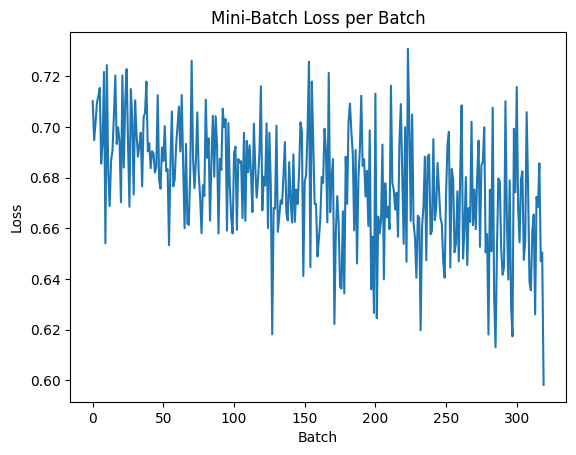

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

X_train = torch.randn(1000, 20)
y_train = torch.randint(0, 2, (1000, 1)).float()

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(20, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model = SimpleNN()

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

batch_losses = []
epochs = 10

for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_losses.append(loss.item())

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

plt.plot(batch_losses)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Mini-Batch Loss per Batch')
plt.show()